In [21]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [22]:
# load data apartemen
url = 'https://raw.githubusercontent.com/nyomanyoga/Damin/master/Exasens.csv'
data = pd.read_csv(url)
data.head()

,Diagnosis,ID,Imaginary Part Min,Avg,Real Part Min,Avg.1,Gender,Age,Smoking
0,COPD,301-4,-320.61,-300.563531,-495.26,-464.171991,1,77,2
1,COPD,302-3,-325.39,-314.750360,-473.73,-469.263140,0,72,2
2,COPD,303-3,-323.00,-317.436056,-476.12,-471.897667,1,73,3
3,COPD,304-4,-327.78,-317.399670,-473.73,-468.856388,1,76,2
4,COPD,305-4,-325.39,-316.155785,-478.52,-472.869783,0,65,2


In [23]:
# Mengisi missing value
data.isnull().sum()

Diagnosis               0
ID                      0
Imaginary Part Min    299
Avg                   299
Real Part Min         299
Avg.1                 299
Gender                  0
Age                     0
Smoking                 0
dtype: int64

In [24]:
# Mengisi missing value
data = data.fillna(data.mean())

data_asli=data

# mengecek corelasi data
data.corr()

,Imaginary Part Min,Avg,Real Part Min,Avg.1,Gender,Age,Smoking
Imaginary Part Min,1.000000,0.980922,0.438120,0.419530,-0.020216,0.058051,-0.038053
Avg,0.980922,1.000000,0.375846,0.421075,-0.015668,0.062543,-0.039717
Real Part Min,0.438120,0.375846,1.000000,0.878389,-0.070783,0.004790,0.021070
Avg.1,0.419530,0.421075,0.878389,1.000000,-0.051241,-0.002184,0.033497
Gender,-0.020216,-0.015668,-0.070783,-0.051241,1.000000,0.230465,0.072074
Age,0.058051,0.062543,0.004790,-0.002184,0.230465,1.000000,0.135352
Smoking,-0.038053,-0.039717,0.021070,0.033497,0.072074,0.135352,1.000000


In [25]:
data_cluster = data[['Imaginary Part Min', 'Avg']]

# normalisasi data with minmax
minmax=preprocessing.MinMaxScaler().fit_transform(data_cluster)
data=pd.DataFrame(minmax, index=data_cluster.index, columns=data_cluster.columns)

In [26]:
X = data_cluster.values

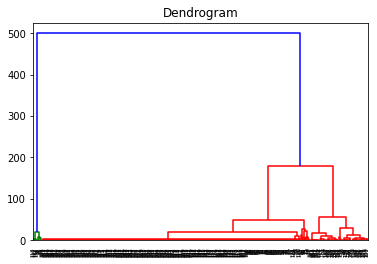

In [27]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.show()

In [28]:
# Menjalankan Hierarchical Clustering ke dataset
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

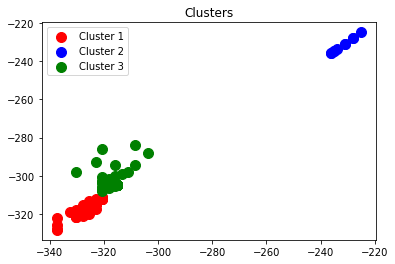

In [29]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.title('Clusters')
plt.legend()
plt.show()

In [30]:
y_hc = pd.DataFrame(y_hc).rename(columns={0:'cluster'})
# y_hc
data_asli['cluster'] = y_hc
data_asli

,Diagnosis,ID,Imaginary Part Min,Avg,Real Part Min,Avg.1,Gender,Age,Smoking,cluster
0,COPD,301-4,-320.6100,-300.563531,-495.2600,-464.171991,1,77,2,2
1,COPD,302-3,-325.3900,-314.750360,-473.7300,-469.263140,0,72,2,0
2,COPD,303-3,-323.0000,-317.436056,-476.1200,-471.897667,1,73,3,0
3,COPD,304-4,-327.7800,-317.399670,-473.7300,-468.856388,1,76,2,0
4,COPD,305-4,-325.3900,-316.155785,-478.5200,-472.869783,0,65,2,0
...,...,...,...,...,...,...,...,...,...,...
394,Infected,I176,-314.9418,-304.779677,-473.0022,-458.701666,0,49,2,2
395,Infected,I177,-314.9418,-304.779677,-473.0022,-458.701666,0,37,1,2
396,Infected,I178,-314.9418,-304.779677,-473.0022,-458.701666,0,29,1,2
397,Infected,I179,-314.9418,-304.779677,-473.0022,-458.701666,1,51,1,2
